In [3]:
import numpy as np
import imageio
import drawSvg
import matplotlib.pyplot as plt

from tempfile import TemporaryFile

- Encode the substitute image as a list of rectangles
- Each rectangle is characterized by its coordinates (sorted) and its color (rgba)
- Assume the rectangles are placed on a black backgroung
- Rectangles are stacked on top of each other additively
- Then you can compute the "difference" image by starting with the original and subtracting out each polygon

Notes:

- Consider the problem of optimally placing a single rectangle. Ignoring the color issue, I thought that maybe you could optimize the coordinates separately, but this is not true. Consider an image with two vertical bars in it; the optimal value of `x1` for fixed `x0` depends on whether `x0` is to the left or the right of the first bar.

C:\Users\626828\AppData\Local\Temp\ipykernel_27604\1799781175.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image_array = imageio.imread("input.jpg")


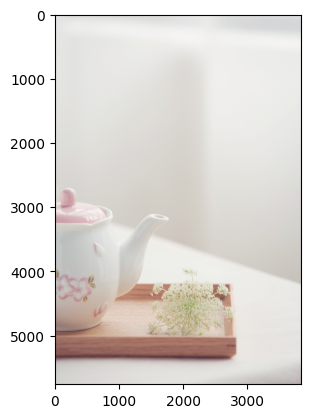

In [4]:
original_image_array = imageio.imread("input.jpg")
plt.imshow(original_image_array)

In [15]:
class Rectangle:
    def __init__(self, x0, y0, x1, y1, r, g, b, a):
        self.x0 = min(x0, x1)
        self.y0 = min(y0, y1)
        self.x1 = max(x0, x1)
        self.y1 = max(y0, y1)
        self.r = r; self.b = b; self.g = g; self.a = a
        
        self.xs = range(self.x0, self.x1)
        self.ys = range(self.y0, self.y1)
        
    def color_times_alpha(self):
        "Return the color tuple times the alpha value, scaled to the 0-255 interval."
        return self.r * self.a // 255, self.g * self.a // 255, self.b * self.a // 255

In [29]:
rectangles = [
    Rectangle(0, 1000, 1000, 2000, 200, 0, 20, 120),
    Rectangle(1000, 3000, 1500, 3500, 20, 210, 20, 180),
    Rectangle(3500, 2000, 5000, 3000, 20, 10, 190, 120)
]

destination_array = np.zeros_like(original_image_array)

In [30]:
original_image_array.shape

(5760, 3840, 3)

In [31]:
def rasterize(destination_array, rectangles):
    destination_array[:] = 0
    for rect in rectangles:
        c = rect.color_times_alpha()
        for x in rect.xs:
            for y in rect.ys:
                for i, v in enumerate(c):
                    destination_array[x, y, i] = min(255, destination_array[x, y, i] + v)

    return destination_array

In [34]:
rasterize(destination_array, rectangles)

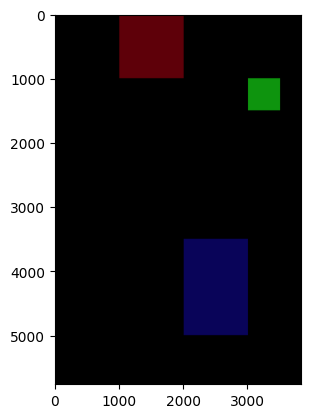

In [ ]:
plt.imshow(destination_array)

In [ ]:
rectangle_coords = (0, 1000, 1000, 2000) # x0, y0, x1, y1
rectangle_color = (200, 0, 20, 120) # r, g, b, a
modified_image_array = np.zeros_like(original_image_array)



In [122]:
def rgb_to_hex(rgb):
    return "#%02x%02x%02x" % rgb

def hex_to_rgb(hexstr):
    r = int(hexstr[1:3], 16)
    g = int(hexstr[3:5], 16)
    b = int(hexstr[5:7], 16)
    return (r, g, b)

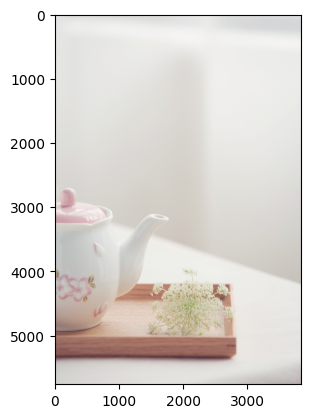

In [124]:
original_image_array.shape

(5760, 3840, 3)

In [125]:
d = drawSvg.Drawing(
    original_image.shape[1],
    original_image.shape[0]
)
d.setRenderSize(original_image_array.shape[1])
d.append(drawSvg.Circle(
    2000, 3000, 200,
    fill=rgb_to_hex((20, 20, 250))
))
# d

In [126]:
working_array.shape

(5760, 3840, 3)

In [130]:
def dissimilarity(drawing, original_image_array, working_file=working_file, working_array=working_array):
    drawing.rasterize(toFile=working_file)
    working_array[:] = imageio.imread(working_file)[:, :, :3]
    
    return sum(abs(float(x) - float(y)) for x, y in zip(original_image_array.flat, working_array.flat))
    
similarity(d, original_image_array)

C:\Users\626828\AppData\Local\Temp\ipykernel_7028\180786144.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  working_array[:] = imageio.imread(working_file)[:, :, :3]


14086996686.0

In [128]:
original_image_array.dtype

dtype('uint8')

> Photo by <a href="https://unsplash.com/@lvenfoto?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Zhang liven</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [52]:
working_file